In [6]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from sklearn import manifold
from sklearn.preprocessing import StandardScaler

In [2]:
final_path = "./dataset/df_final.csv"

In [9]:
df_final = pd.read_csv(final_path)

In [10]:
df_final

,day,day_number,month,daytime,hour,title,duration,duration_with_advertising,channel,year,genres,rating,advertising
0,Martedì,25,gennaio,notte,01:10,match point,124,125,Sky Cinema Due,2005,"Drama,Romance,Thriller",7.6,1
1,Martedì,26,aprile,notte,04:35,match point,124,125,Sky Cinema Due,2005,"Drama,Romance,Thriller",7.6,1
2,Mercoledì,10,agosto,sera,23:10,match point,124,141,Iris,2005,"Drama,Romance,Thriller",7.6,17
3,Lunedì,9,maggio,notte,02:25,match point,124,125,Sky Cinema Due,2005,"Drama,Romance,Thriller",7.6,1
4,Venerdì,19,agosto,notte,01:05,match point,124,125,Sky Cinema Due,2005,"Drama,Romance,Thriller",7.6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5138,Giovedì,10,novembre,notte,00:52,meo patacca,124,138,Rete 4,1972,"Adventure,Comedy",6.2,14
5139,Mercoledì,2,febbraio,mattina,08:47,i prepotenti,93,101,Iris,1958,Comedy,6.5,8
5140,Lunedì,9,maggio,mattina,08:11,le soldatesse,119,139,Iris,1965,"Drama,War",7.5,20
5141,Venerdì,2,settembre,notte,02:30,6000 km di paura,90,92,Rete 4,1978,"Action,Adventure",4.8,2


In [59]:
def jaccard(s1, s2):
    union = set(s1.split(",")).union(set(s2.split(",")))
    intersection = set(s1.split(",")).intersection(set(s2.split(",")))

    return len(intersection) / len(union)




In [ ]:
df = df_final[['day', 'day_number', 'month', 'daytime', 'title', 'duration', 'duration_with_advertising', 'year', 'genres', 'rating', 'advertising']]

In [15]:
df_categorical = df_final[['day', 'month', 'daytime', 'title', 'genres']]

In [27]:
df_numerical = df_final[['day_number', 'duration', 'duration_with_advertising', 'year', 'rating', 'advertising']]

In [28]:
scaler = StandardScaler()
numerical = scaler.fit_transform(df_numerical.to_numpy())

In [32]:
shape = df_final.shape[0]

In [33]:
dissM_days = np.zeros((shape, shape))
dissM_months = np.zeros((shape, shape))
dissM_daytimes = np.zeros((shape, shape))
dissM_titles = np.zeros((shape, shape))
dissM_genres = np.zeros((shape, shape))

dissM_day_numbers = np.zeros((shape, shape))
dissM_durations = np.zeros((shape, shape))
dissM_durations_with_advertising = np.zeros((shape, shape))
dissM_genres = np.zeros((shape, shape))
dissM_years = np.zeros((shape, shape))
dissM_ratings = np.zeros((shape, shape))
dissM_advertising = np.zeros((shape, shape))

In [36]:
genres = df_categorical['genres'].values

In [52]:
genres

array(['Drama,Romance,Thriller', 'Drama,Romance,Thriller',
       'Drama,Romance,Thriller', ..., 'Drama,War', 'Action,Adventure',
       'Action,Crime,Drama'], dtype=object)

In [61]:
for i in range(shape):
    for j in range(shape):

        dissM_genres[i][j] = 1 - jaccard(genres[i], genres[j])
        # dissM_months = np.zeros((shape, shape))
        # dissM_daytimes = np.zeros((shape, shape))
        # dissM_titles = np.zeros((shape, shape))
        # dissM_genres = np.zeros((shape, shape))

        # dissM_day_numbers = np.zeros((shape, shape))
        # dissM_durations = np.zeros((shape, shape))
        # dissM_durations_with_advertising = np.zeros((shape, shape))
        # dissM_genres = np.zeros((shape, shape))
        # dissM_years = np.zeros((shape, shape))
        # dissM_ratings = np.zeros((shape, shape))
        # dissM_advertising = np.zeros((shape, shape))


In [62]:
dissM_genres

array([[0.  , 0.  , 0.  , ..., 0.75, 1.  , 0.8 ],
       [0.  , 0.  , 0.  , ..., 0.75, 1.  , 0.8 ],
       [0.  , 0.  , 0.  , ..., 0.75, 1.  , 0.8 ],
       ...,
       [0.75, 0.75, 0.75, ..., 0.  , 1.  , 0.75],
       [1.  , 1.  , 1.  , ..., 1.  , 0.  , 0.75],
       [0.8 , 0.8 , 0.8 , ..., 0.75, 0.75, 0.  ]])

In [68]:
mds = manifold.MDS(n_components=2, max_iter=2, eps=1e-9, dissimilarity="precomputed", random_state=0)

In [69]:
pos = mds.fit(dissM_genres).embedding_

In [71]:
titles = df_categorical['title'].values

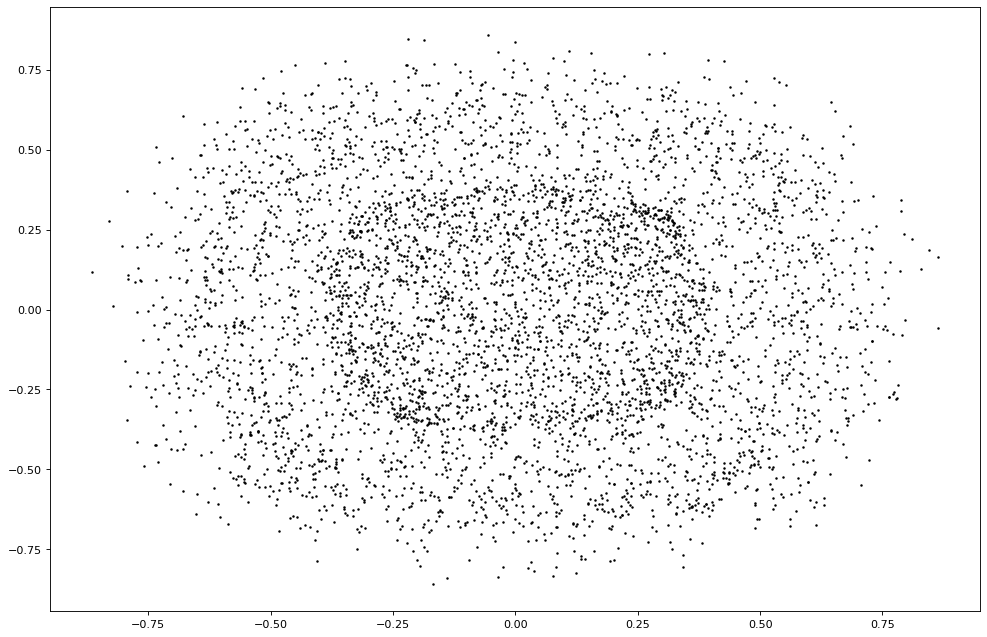

In [80]:
from matplotlib.pyplot import figure

figure(figsize=(15, 10), dpi=80)

plt.scatter(pos[:,0], pos[:,1], color='black',s=5, lw=0)
plt.show()